In [35]:
import pandas as pd

# Import the data 
bike_201801 = pd.read_csv("201801-fordgobike-tripdata.csv")
bike_201802 = pd.read_csv("201802-fordgobike-tripdata.csv")
bike_201803 = pd.read_csv("201803-fordgobike-tripdata.csv")
bike_201804 = pd.read_csv("201804-fordgobike-tripdata.csv")
bike_201805 = pd.read_csv("201805-fordgobike-tripdata.csv")
bike_201806 = pd.read_csv("201806-fordgobike-tripdata.csv")
bike_201807 = pd.read_csv("201807-fordgobike-tripdata.csv")
bike_201808 = pd.read_csv("201808-fordgobike-tripdata.csv")
bike_201809 = pd.read_csv("201809-fordgobike-tripdata.csv")
bike_201810 = pd.read_csv("201810-fordgobike-tripdata.csv")
bike_201811 = pd.read_csv("201811-fordgobike-tripdata.csv")
bike_201812 = pd.read_csv("201812-fordgobike-tripdata.csv")

In [36]:
Bike_data_2018 = pd.concat([bike_201801,
                            bike_201802,
                            bike_201803,
                            bike_201804,
                            bike_201805,
                            bike_201806,
                            bike_201807,
                            bike_201808,
                            bike_201809,
                            bike_201810,
                            bike_201811,
                            bike_201812],axis=0)

In [37]:
Bike_data_2018.shape

(1863721, 16)

In [38]:
Bike_data_2018.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [39]:
# Import the Weather Station Site List Data
site_list = pd.read_csv("SiteList.csv")
site_list.head()

,Site4,City,TimeZone,OffUTC,State,Lat,Lon,Elevation(feet)
0,CWAJ,ERIEAU (MAPS),EST,-5,ON,42.250000,-81.900000,584
1,CWBE,KILLARNEY (MAPS),EST,-5,ON,45.966667,-81.466667,643
2,CWBZ,ST ANICET,EST,-5,QC,45.116667,-74.266667,161
3,CWFJ,CARDSTON (AUT),MST,-7,AB,49.200000,-113.266667,3727
4,CWGD,GODERICH (AUTO8),EST,-5,ON,43.766667,-81.716667,702


In [40]:
site_list = site_list.drop(site_list[(site_list.TimeZone != 'PST')].index)

In [41]:
Sample_bike_2018 = Bike_data_2018.sample(n=5000)

In [42]:
Sample_bike_2018.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
71194,72358,2018-05-18 12:40:19.3930,2018-05-19 08:46:17.7030,276.0,Julian St at The Alameda,37.332233,-121.912517,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,429,Customer,1950.0,Male,No
88328,905,2018-05-16 13:32:42.1170,2018-05-16 13:47:48.0110,157.0,65th St at Hollis St,37.846784,-122.291376,204.0,55th St at Telegraph Ave,37.840186,-122.261823,2966,Subscriber,1992.0,Female,No
128717,2285,2018-08-10 17:19:37.5420,2018-08-10 17:57:42.7220,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,145.0,29th St at Church St,37.743684,-122.426806,2543,Subscriber,1982.0,Female,No
175087,442,2018-10-04 14:40:12.8640,2018-10-04 14:47:35.6970,87.0,Folsom St at 13th St,37.769757,-122.415674,109.0,17th St at Valencia St,37.763316,-122.421904,2698,Customer,1989.0,Female,No
138118,385,2018-09-10 07:23:49.3410,2018-09-10 07:30:15.2880,196.0,Grand Ave at Perkins St,37.808894,-122.256460,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,325,Subscriber,1989.0,Male,No


In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

In [44]:
def get_closest_city(lat_1, lng_1):
    
    shortest_distance = 100000
    closest_city = None
    closest_distance = None
    
    for i, row in site_list.iterrows():
        lat_2 = row['Lat']
        lng_2 = row['Lon']
         
        d_lat = lat_2 - lat_1
        d_lng = lng_2 - lng_1 

        temp = (  
          math.sin(d_lat / 2) ** 2 
        + math.cos(lat_1) 
        * math.cos(lat_2) 
        * math.sin(d_lng / 2) ** 2
        )

        distance =  6373.0 * (2 * math.atan2(math.sqrt(temp), math.sqrt(1 - temp)))
    
        if distance < shortest_distance:
            closest_distance = distance
            closest_city = row['City']
            closest_site = row['Site4']
            shortest_distance = distance

    return closest_city, closest_site    

In [45]:
# %%pixie_debugger
for i, row in Sample_bike_2018.iterrows():
    Sample_bike_2018.at[i,'closest_city'], Sample_bike_2018.at[i,'Site']= get_closest_city(row['start_station_latitude'],
                                                            row['start_station_longitude'])

In [46]:
Sample_bike_2018.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,closest_city,Site
71194,72358,2018-05-18 12:40:19.3930,2018-05-19 08:46:17.7030,276.0,Julian St at The Alameda,37.332233,-121.912517,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,429,Customer,1950.0,Male,No,SAN FRANCISCO,KSFO
88328,905,2018-05-16 13:32:42.1170,2018-05-16 13:47:48.0110,157.0,65th St at Hollis St,37.846784,-122.291376,204.0,55th St at Telegraph Ave,37.840186,-122.261823,2966,Subscriber,1992.0,Female,No,OAKLAND,KOAK
128717,2285,2018-08-10 17:19:37.5420,2018-08-10 17:57:42.7220,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,145.0,29th St at Church St,37.743684,-122.426806,2543,Subscriber,1982.0,Female,No,SAN FRANCISCO,KSFO
175087,442,2018-10-04 14:40:12.8640,2018-10-04 14:47:35.6970,87.0,Folsom St at 13th St,37.769757,-122.415674,109.0,17th St at Valencia St,37.763316,-122.421904,2698,Customer,1989.0,Female,No,SAN FRANCISCO,KSFO
138118,385,2018-09-10 07:23:49.3410,2018-09-10 07:30:15.2880,196.0,Grand Ave at Perkins St,37.808894,-122.256460,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,325,Subscriber,1989.0,Male,No,OAKLAND,KOAK


In [47]:
Sample_bike_2018['Date'] = pd.to_datetime(Sample_bike_2018.start_time)

In [48]:
Sample_bike_2018.Date.dt.date

71194     2018-05-18
88328     2018-05-16
128717    2018-08-10
175087    2018-10-04
138118    2018-09-10
133451    2018-11-01
118811    2018-04-03
35433     2018-08-26
81052     2018-04-13
43095     2018-09-24
70383     2018-09-19
113547    2018-04-04
80189     2018-02-07
170250    2018-06-05
28324     2018-05-26
189933    2018-10-02
131029    2018-09-11
135069    2018-09-10
26278     2018-11-25
60135     2018-02-12
35916     2018-04-24
121169    2018-04-03
27420     2018-07-27
42755     2018-09-24
74719     2018-09-19
185504    2018-07-03
158802    2018-06-06
24454     2018-10-28
79840     2018-05-17
158800    2018-10-07
             ...    
91895     2018-12-10
151873    2018-10-08
83845     2018-03-08
82172     2018-08-18
92290     2018-06-17
50715     2018-08-23
124864    2018-10-12
149652    2018-06-08
182601    2018-08-02
27547     2018-03-26
49401     2018-12-18
151030    2018-05-05
40921     2018-06-25
78458     2018-06-19
4196      2018-04-30
48090     2018-06-23
113450    201

In [49]:
# Import the Weather  Data
Weather_data = pd.read_csv("HourlyData2018.txt",sep=',',low_memory=False)

In [50]:
Weather_data.head()

,Site,Date,Hour,Temperature,Dewpoint,RH,WindDir,Windspeed,CldFrac,MSLP,Weather,Precip,Source
0,CWAJ,1/1/2018 0:00:00,0,6,-4,63,280,4,NaN,NaN,NaN,NaN,Filled
1,CWAJ,1/1/2018 0:00:00,1,3,-6,65,000,3,NaN,NaN,NaN,NaN,Filled
2,CWAJ,1/1/2018 0:00:00,2,5,-3,69,220,5,NaN,NaN,NaN,NaN,Filled
3,CWAJ,1/1/2018 0:00:00,3,5,-3,69,250,5,NaN,NaN,NaN,NaN,Filled
4,CWAJ,1/1/2018 0:00:00,4,6,-2,69,260,5,NaN,NaN,NaN,NaN,Filled


In [51]:
Sample_bike_2018['Date_1'] = Sample_bike_2018.Date.dt.date

In [52]:
Sample_bike_2018['Hour'] = Sample_bike_2018.Date.dt.hour

In [53]:
Sample_bike_2018.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,closest_city,Site,Date,Date_1,Hour
71194,72358,2018-05-18 12:40:19.3930,2018-05-19 08:46:17.7030,276.0,Julian St at The Alameda,37.332233,-121.912517,314.0,Santa Clara St at Almaden Blvd,37.333988,...,429,Customer,1950.0,Male,No,SAN FRANCISCO,KSFO,2018-05-18 12:40:19.393,2018-05-18,12
88328,905,2018-05-16 13:32:42.1170,2018-05-16 13:47:48.0110,157.0,65th St at Hollis St,37.846784,-122.291376,204.0,55th St at Telegraph Ave,37.840186,...,2966,Subscriber,1992.0,Female,No,OAKLAND,KOAK,2018-05-16 13:32:42.117,2018-05-16,13
128717,2285,2018-08-10 17:19:37.5420,2018-08-10 17:57:42.7220,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,145.0,29th St at Church St,37.743684,...,2543,Subscriber,1982.0,Female,No,SAN FRANCISCO,KSFO,2018-08-10 17:19:37.542,2018-08-10,17
175087,442,2018-10-04 14:40:12.8640,2018-10-04 14:47:35.6970,87.0,Folsom St at 13th St,37.769757,-122.415674,109.0,17th St at Valencia St,37.763316,...,2698,Customer,1989.0,Female,No,SAN FRANCISCO,KSFO,2018-10-04 14:40:12.864,2018-10-04,14
138118,385,2018-09-10 07:23:49.3410,2018-09-10 07:30:15.2880,196.0,Grand Ave at Perkins St,37.808894,-122.256460,7.0,Frank H Ogawa Plaza,37.804562,...,325,Subscriber,1989.0,Male,No,OAKLAND,KOAK,2018-09-10 07:23:49.341,2018-09-10,7


In [57]:
Weather_data['Date'] = pd.to_datetime(Weather_data.Date)

In [58]:
Weather_data.head()

,Site,Date,Hour,Temperature,Dewpoint,RH,WindDir,Windspeed,CldFrac,MSLP,Weather,Precip,Source
0,CWAJ,2018-01-01,0,6,-4,63,280,4,NaN,NaN,NaN,NaN,Filled
1,CWAJ,2018-01-01,1,3,-6,65,000,3,NaN,NaN,NaN,NaN,Filled
2,CWAJ,2018-01-01,2,5,-3,69,220,5,NaN,NaN,NaN,NaN,Filled
3,CWAJ,2018-01-01,3,5,-3,69,250,5,NaN,NaN,NaN,NaN,Filled
4,CWAJ,2018-01-01,4,6,-2,69,260,5,NaN,NaN,NaN,NaN,Filled


In [59]:
Weather_data['Date_1'] = Weather_data.Date.dt.date

In [60]:
Weather_data.head()

,Site,Date,Hour,Temperature,Dewpoint,RH,WindDir,Windspeed,CldFrac,MSLP,Weather,Precip,Source,Date_1
0,CWAJ,2018-01-01,0,6,-4,63,280,4,NaN,NaN,NaN,NaN,Filled,2018-01-01
1,CWAJ,2018-01-01,1,3,-6,65,000,3,NaN,NaN,NaN,NaN,Filled,2018-01-01
2,CWAJ,2018-01-01,2,5,-3,69,220,5,NaN,NaN,NaN,NaN,Filled,2018-01-01
3,CWAJ,2018-01-01,3,5,-3,69,250,5,NaN,NaN,NaN,NaN,Filled,2018-01-01
4,CWAJ,2018-01-01,4,6,-2,69,260,5,NaN,NaN,NaN,NaN,Filled,2018-01-01


In [61]:
sample_bike_2018=Sample_bike_2018.merge(Weather_data[['Date_1','Hour','Site','Temperature','Windspeed','Precip']],
                                        on=['Site','Date_1','Hour'])

In [62]:
sample_bike_2018.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,closest_city,Site,Date,Date_1,Hour,Temperature,Windspeed,Precip
0,72358,2018-05-18 12:40:19.3930,2018-05-19 08:46:17.7030,276.0,Julian St at The Alameda,37.332233,-121.912517,314.0,Santa Clara St at Almaden Blvd,37.333988,...,Male,No,SAN FRANCISCO,KSFO,2018-05-18 12:40:19.393,2018-05-18,12,61,11,0.0
1,905,2018-05-16 13:32:42.1170,2018-05-16 13:47:48.0110,157.0,65th St at Hollis St,37.846784,-122.291376,204.0,55th St at Telegraph Ave,37.840186,...,Female,No,OAKLAND,KOAK,2018-05-16 13:32:42.117,2018-05-16,13,64,14,0.0
2,2285,2018-08-10 17:19:37.5420,2018-08-10 17:57:42.7220,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,145.0,29th St at Church St,37.743684,...,Female,No,SAN FRANCISCO,KSFO,2018-08-10 17:19:37.542,2018-08-10,17,67,18,0.0
3,658,2018-08-10 17:53:16.1170,2018-08-10 18:04:14.6970,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,99.0,Folsom St at 15th St,37.767037,...,Male,No,SAN FRANCISCO,KSFO,2018-08-10 17:53:16.117,2018-08-10,17,67,18,0.0
4,109,2018-08-10 17:31:59.6960,2018-08-10 17:33:49.1360,367.0,Outside Lands 2018 (Temporary Station),37.771104,-122.473658,367.0,Outside Lands 2018 (Temporary Station),37.771104,...,Male,No,SAN FRANCISCO,KSFO,2018-08-10 17:31:59.696,2018-08-10,17,67,18,0.0


In [63]:
from sklearn.cluster import KMeans

In [64]:
x = sample_bike_2018[['duration_sec','Temperature','Precip']]
x.duration_sec = (x.duration_sec/60)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [65]:
k_means = KMeans(n_clusters = 3,random_state=0).fit(x)

In [66]:
print(k_means.labels_)

[1 0 0 ... 0 0 0]


In [67]:
x['cluster'] = k_means.labels_
k_means.cluster_centers_

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[ 1.16492919e+01,  6.05229618e+01,  5.96075258e-04],
       [ 9.85573810e+02,  6.08571429e+01,  0.00000000e+00],
       [ 1.56654333e+02,  6.31800000e+01, -5.42101086e-19]])

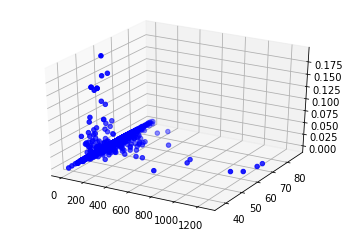

In [68]:
colors = {'1' : 'b',
          '2' : 'y',
          '3' : 'r'}
cluster = ['1','2','3']

ax = plt.axes(projection='3d')
ax.scatter3D(x.duration_sec,x.Temperature,x.Precip, c='b')

In [69]:
Sample_bike_2018['Age'] = (2019 - Sample_bike_2018.member_birth_year)
Sample_bike_2018.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,closest_city,Site,Date,Date_1,Hour,Age
71194,72358,2018-05-18 12:40:19.3930,2018-05-19 08:46:17.7030,276.0,Julian St at The Alameda,37.332233,-121.912517,314.0,Santa Clara St at Almaden Blvd,37.333988,...,Customer,1950.0,Male,No,SAN FRANCISCO,KSFO,2018-05-18 12:40:19.393,2018-05-18,12,69.0
88328,905,2018-05-16 13:32:42.1170,2018-05-16 13:47:48.0110,157.0,65th St at Hollis St,37.846784,-122.291376,204.0,55th St at Telegraph Ave,37.840186,...,Subscriber,1992.0,Female,No,OAKLAND,KOAK,2018-05-16 13:32:42.117,2018-05-16,13,27.0
128717,2285,2018-08-10 17:19:37.5420,2018-08-10 17:57:42.7220,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,145.0,29th St at Church St,37.743684,...,Subscriber,1982.0,Female,No,SAN FRANCISCO,KSFO,2018-08-10 17:19:37.542,2018-08-10,17,37.0
175087,442,2018-10-04 14:40:12.8640,2018-10-04 14:47:35.6970,87.0,Folsom St at 13th St,37.769757,-122.415674,109.0,17th St at Valencia St,37.763316,...,Customer,1989.0,Female,No,SAN FRANCISCO,KSFO,2018-10-04 14:40:12.864,2018-10-04,14,30.0
138118,385,2018-09-10 07:23:49.3410,2018-09-10 07:30:15.2880,196.0,Grand Ave at Perkins St,37.808894,-122.256460,7.0,Frank H Ogawa Plaza,37.804562,...,Subscriber,1989.0,Male,No,OAKLAND,KOAK,2018-09-10 07:23:49.341,2018-09-10,7,30.0


In [70]:
x1 = Sample_bike_2018[['duration_sec','Age']].dropna()
x1.duration_sec = (x1.duration_sec/60)
k_means1 = KMeans(n_clusters = 3,random_state=0).fit(x1)
x1['cluster'] = k_means1.labels_
k_means1.cluster_centers_

array([[127.48914729,  34.58139535],
       [962.78888889,  42.83333333],
       [ 11.12652487,  35.98054724]])

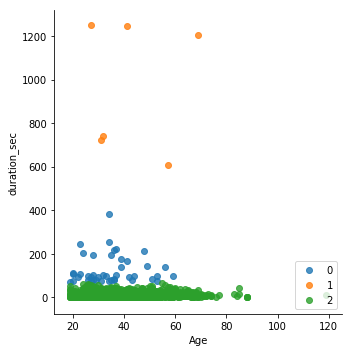

In [71]:
# library & dataset
import seaborn as sns
# df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Age", y="duration_sec", data=x1, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

In [ ]:
x2 = sample_bike_2018[['duration_sec','start_station_id']].dropna()
x2.duration_sec = (x2.duration_sec/60)
k_means2 = KMeans(n_clusters = 3,random_state=0).fit(x2)
x2['cluster'] = k_means2.labels_
k_means2.cluster_centers_

In [ ]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="start_station_id", y="duration_sec", data=x2, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()